In [2]:
using AutomotiveSimulator
using AutomotiveVisualization
# using EzXML
# using Interact
# using Reactive

In [1]:
using LinearAlgebra
using Printf

In [3]:
# using AutoUrban
include("../src/actions.jl")
include("../src/roadway/roadway_generation.jl")
include("../src/roadway/roadway_perception.jl")
include("../src/roadway/roadway_intersection.jl")
include("../src/roadway/convert2xodr.jl")

convert_roadway! (generic function with 1 method)

## Build Environment

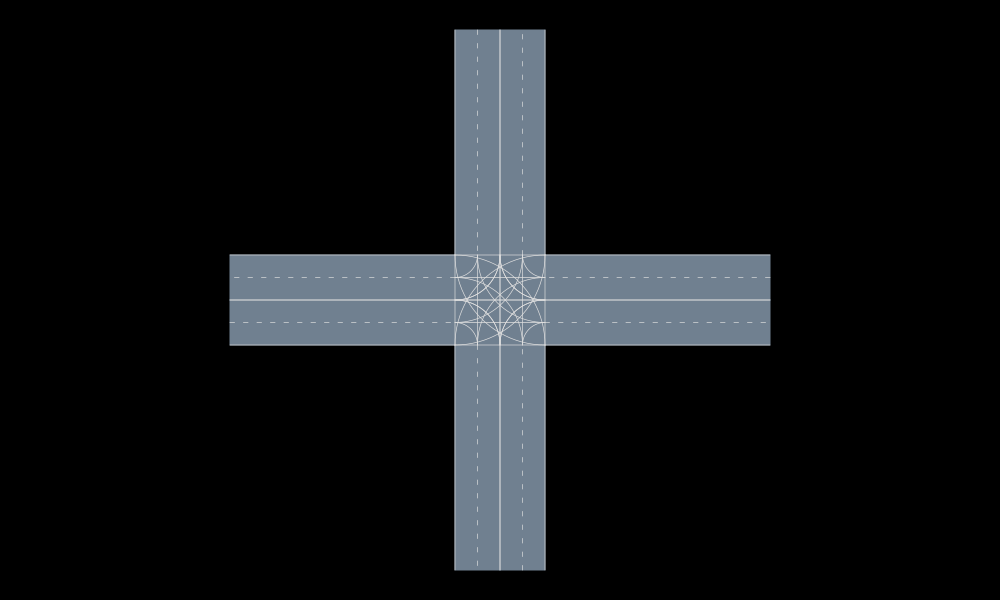

In [4]:
roadlength = 50.0
lane_width = 5.0
roadway,junction = gen_intersection(roadlength = roadlength, lane_width = lane_width)
render([roadway])

Scene{Entity{VehicleState,BicycleModel,Int64}}(0 entities)
Scene{Entity{VehicleState,BicycleModel,Int64}}(3 entities)


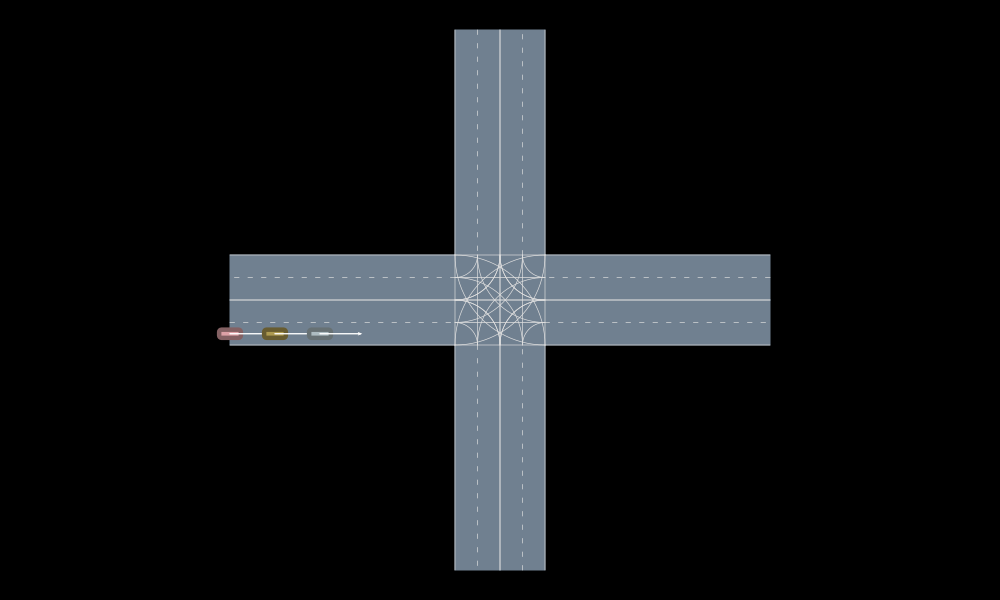

In [5]:
scene = Scene(Entity{VehicleState, BicycleModel, Int},100)
print(scene,"\n")

id=1
push!(scene,Entity(VehicleState(VecSE2(0.0,0.0,0.0), roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(VecSE2(10.0,0.0,0.0), roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(VecSE2(20.0,0.0,0.0), roadway, 9.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
print(scene,"\n")
render([roadway, scene])

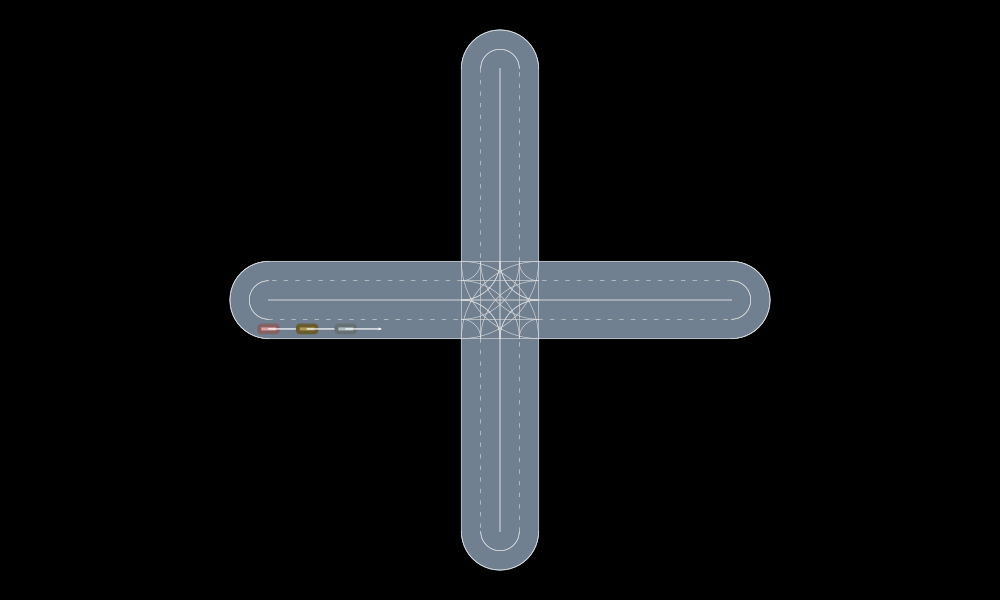

In [7]:
connect_two_seg!(roadway.segments[2],roadway.segments[3],roadway)
connect_two_seg!(roadway.segments[4],roadway.segments[5],roadway)
connect_two_seg!(roadway.segments[6],roadway.segments[7],roadway)
connect_two_seg!(roadway.segments[8],roadway.segments[1],roadway)
render([roadway, scene])

## Add Models

In [8]:
framerate = 24
timeStep = 0.05

models = Dict{Int, DriverModel}()
models[1] = Tim2DDriver(mlane=MOBIL())
models[2] = Tim2DDriver(mlane=MOBIL())
models[3] = IntelligentDriverModel()


IntelligentDriverModel
  a: Float64 NaN
  σ: Float64 NaN
  k_spd: Float64 1.0
  δ: Float64 4.0
  T: Float64 1.5
  v_des: Float64 29.0
  s_min: Float64 5.0
  a_max: Float64 3.0
  d_cmf: Float64 2.0
  d_max: Float64 9.0


## Simulation

In [9]:
function drawsim(t)
    nticks = 1
    scene_list = simulate(scene, roadway, models, nticks, timeStep)
    print(scene_list, "\n")
    render([roadway, scene_list[t]])

end


drawsim (generic function with 1 method)

Scene{Entity{VehicleState,BicycleModel,Int64}}[Scene{Entity{VehicleState,BicycleModel,Int64}}(3 entities), Scene{Entity{VehicleState,BicycleModel,Int64}}(3 entities)]


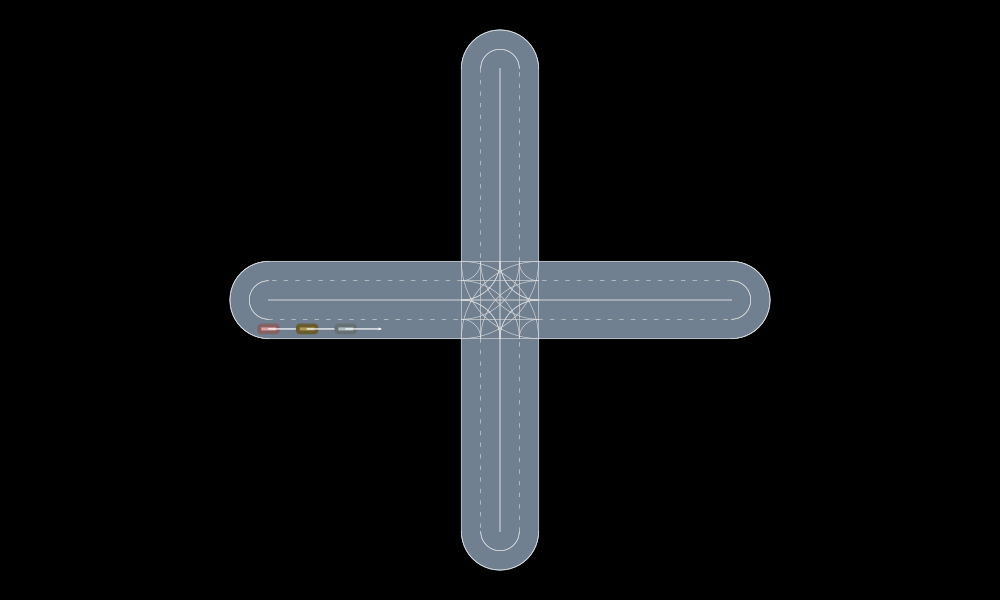

In [10]:
drawsim(1)

Scene{Entity{VehicleState,BicycleModel,Int64}}[Scene{Entity{VehicleState,BicycleModel,Int64}}(3 entities), Scene{Entity{VehicleState,BicycleModel,Int64}}(3 entities)]


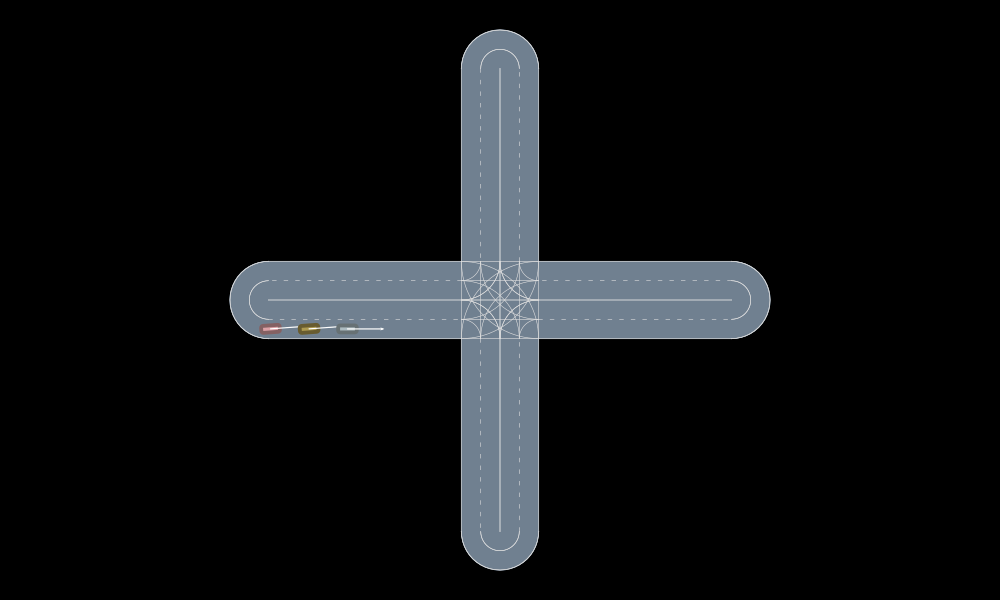

In [11]:
drawsim(2)

In [12]:
ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim, timestamps)

UndefVarError: UndefVarError: fps not defined